# The Civilian Complaint Review Board (CCRB): New York City
## Table of Contents
<ul>
<li> <a href="#intro"> Introduction </a></li>
<li> <a href="#Libraries"> Libraries and Setting </a></li>
<li> <a href="#Loading"> Loading Data </a></li>
<li> <a href="#Exploring"> Cleaning and Exploring Data </a></li>
<li> <a href="#Analyzing"> Analyzing Data </a></li>

<a id="intro"></a>
# Introduction


The Civilian Complaint Review Board (CCRB) of New York City releases anonymized data about complaints it has received reguarding civilian interactions with police. Besides their aggregated reporting data, they release record-level data as an Excel spreadsheet. It has more that 200K records with 16 features. This is the description of the Excel data:

* Column A: DateStamp - the date the file was created. 
* Column B: UniqueComplaintId - a randomly assigned number used to uniquely identify distinct complaints. A single UniqueComplaintId may have multiple associated allegations.
* Column C: Close Year - the year the complaint was closed by the CCRB.
* Column D: CCRB Received Year - the year the complaint was received by the CCRB.
* Column E: Borough of Occurrence - the borough in which the incident occurred.
* Column F: Is Full Investigation - a logical marker indicating whether the complaint was fully investigated by the CCRB.
* Column G: Complaint Has Video Evidence - a logical marker indicating whether the CCRB has collected any video associated with the complaint.
* Column H: Complaint Filed Mode - how the complaint was filed.
* Column I: Complaint Filed Place - where the complaint was filed.
* Column J: Complaint Contains Stop & Frisk Allegations - a logical marker indicating whether the complaint contains an allegation of stop, question, search of person or frisk.
* Column K: Incident Location - a general description of the incident location.
* Column L: Incident Year - the year of the incident which led to the complaint.
* Column M: Encounter Outcome - the outcome of the encounter.
* Column N: Reason For Initial Contact - the reason for initial contact.
* Column O: Allegation FADO Type - the FADO type of the allegation (Force; Abuse of Authority; Discourtesy; Offensive Language).
* Column P: Allegation Description - the description of the allegation.

<a id="map"></a>
## Libraries and Setting

In [125]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="getting"></a>
## Loading Data

In [126]:
file_name = "/Users/behruz/Documents/udacity/Data_Analysis/workshop/ccrb_datatransparencyinitiative_20170207.xlsx"
df = pd.read_excel(file_name, sheetname="Complaints_Allegations")
df.head()

,DateStamp,UniqueComplaintId,Close Year,Received Year,Borough of Occurrence,Is Full Investigation,Complaint Has Video Evidence,Complaint Filed Mode,Complaint Filed Place,Complaint Contains Stop & Frisk Allegations,Incident Location,Incident Year,Encounter Outcome,Reason For Initial Contact,Allegation FADO Type,Allegation Description
0,2017-02-07,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,2017-02-07,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


<a id="data audit"></a>
## Cleaning & Exploring Data

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206718 entries, 0 to 206717
Data columns (total 16 columns):
DateStamp                                      206718 non-null datetime64[ns]
UniqueComplaintId                              206718 non-null int64
Close Year                                     206718 non-null int64
Received Year                                  206718 non-null int64
Borough of Occurrence                          206216 non-null object
Is Full Investigation                          206718 non-null bool
Complaint Has Video Evidence                   206718 non-null bool
Complaint Filed Mode                           206718 non-null object
Complaint Filed Place                          206718 non-null object
Complaint Contains Stop & Frisk Allegations    206718 non-null bool
Incident Location                              203349 non-null object
Incident Year                                  206718 non-null int64
Encounter Outcome                              2067

There is 16 features for every record in the Dataframe, 12 of which are either boolean, categorical or date! Number of unique complaints based on UniqueComplaintId is:

In [128]:
#number of unique complaints
unique_complaint = len(df['UniqueComplaintId'].unique())
unique_complaint

70245

Each complaint can have multipe allegation. The average number of allegations per complaint is:

In [129]:
#The average number of allegations per complaint
round(float(len(df))/unique_complaint,1)

2.9

Number of records with missing value/values is:

In [130]:
#number of records with missing values
len(df) - len(df.dropna())

4328

Number of unique complaints without missing values:

In [131]:
#Unique complaints without missing values
df.dropna(inplace = True)
len(df['UniqueComplaintId'].unique())

68467

In [132]:
# This function will draw frequency bar chart for any input feature in the Dataframe
def bar_chart(data, attribute_name):
    count = data[attribute_name].value_counts()
    plt.figure(figsize=(10,10))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.xticks(rotation='vertical')
    plt.title('Number of complaints per %s'%attribute_name)
    plt.ylabel('Number of complaints', fontsize=12)
    plt.xlabel(attribute_name, fontsize=12)
    plt.show()

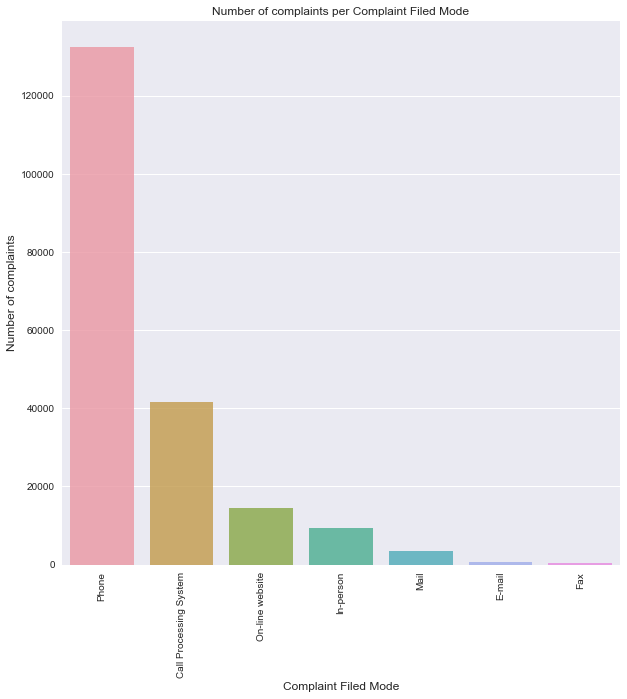

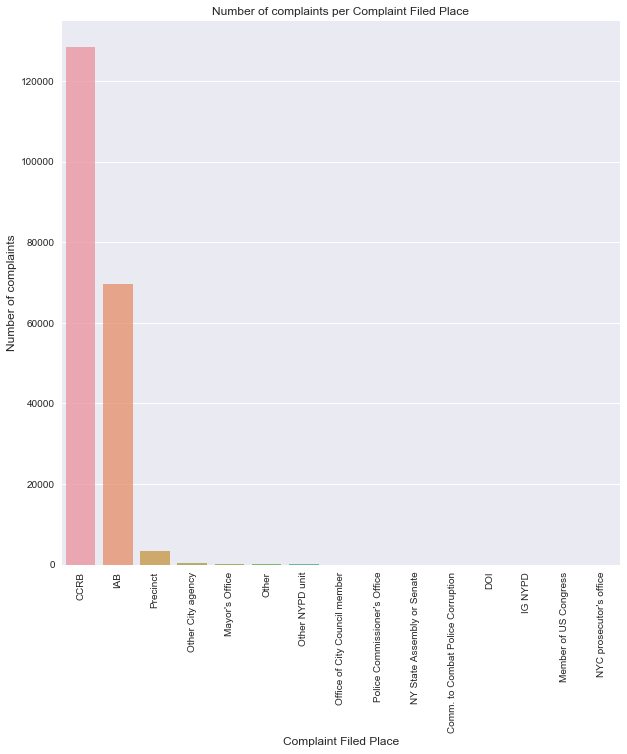

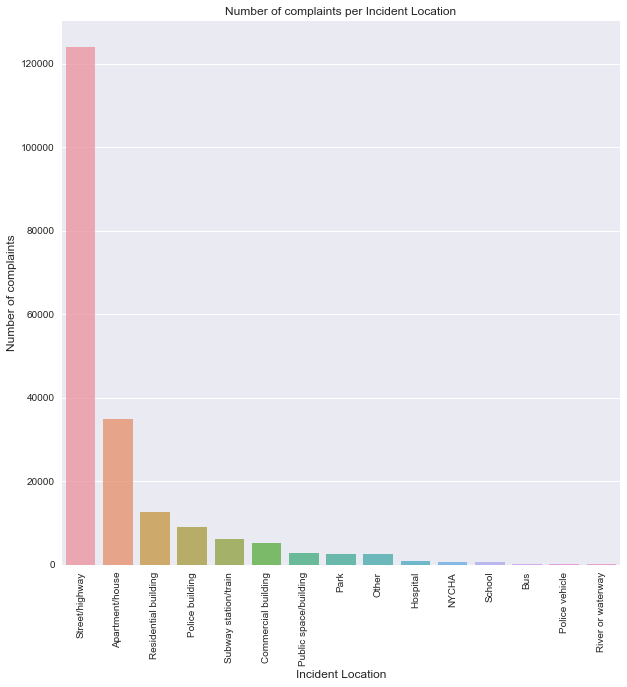

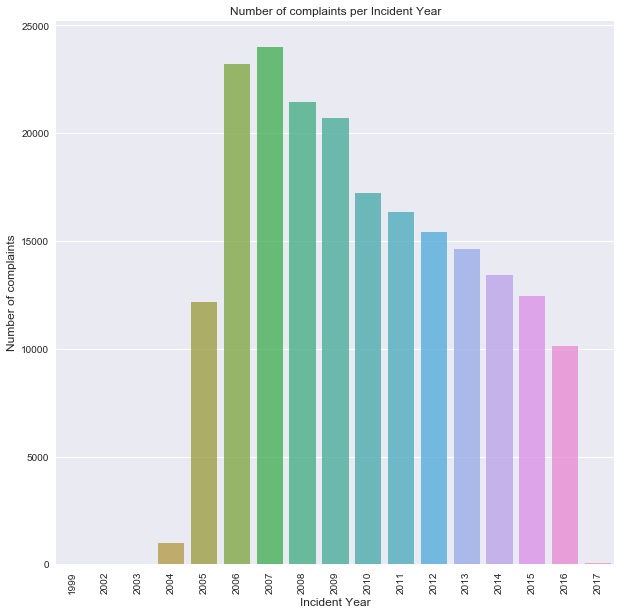

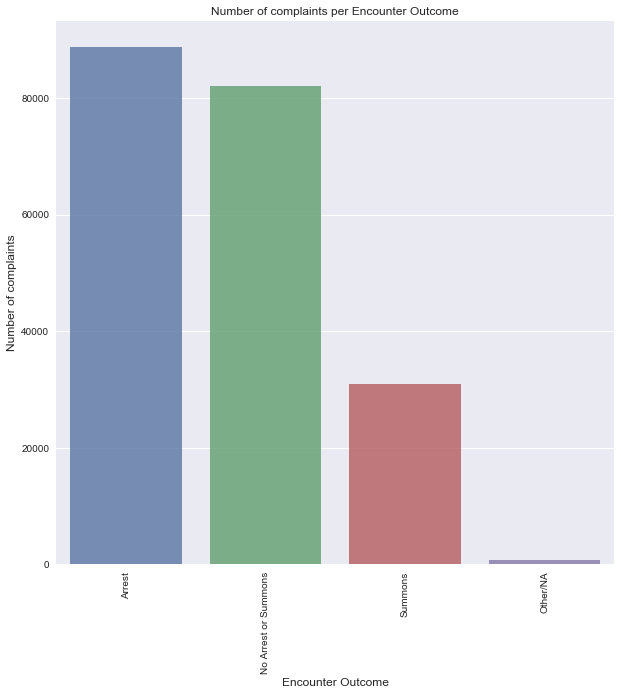

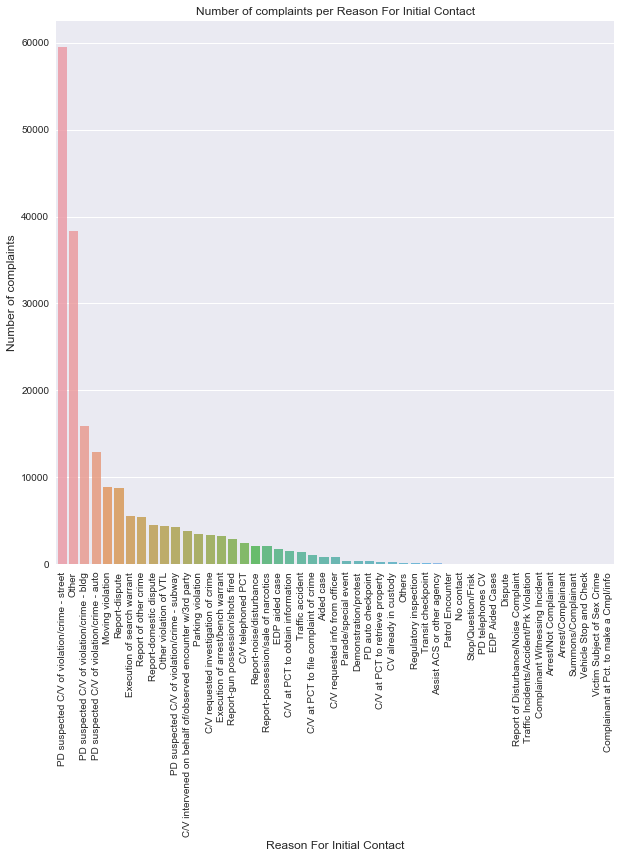

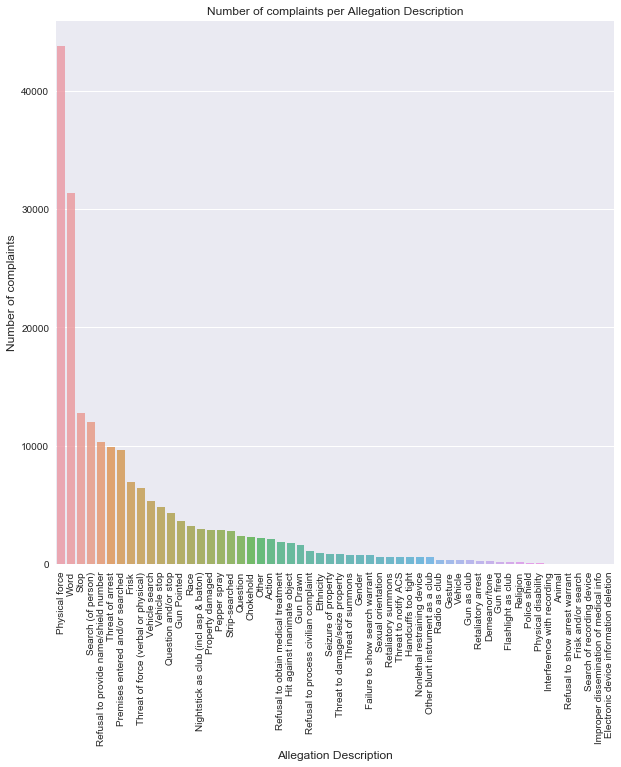

In [133]:
bar_chart(df, 'Complaint Filed Mode')
bar_chart(df, 'Complaint Filed Place')
bar_chart(df, 'Incident Location')
bar_chart(df, 'Incident Year')
bar_chart(df, 'Encounter Outcome')
bar_chart(df, 'Reason For Initial Contact')
bar_chart(df, 'Allegation Description')


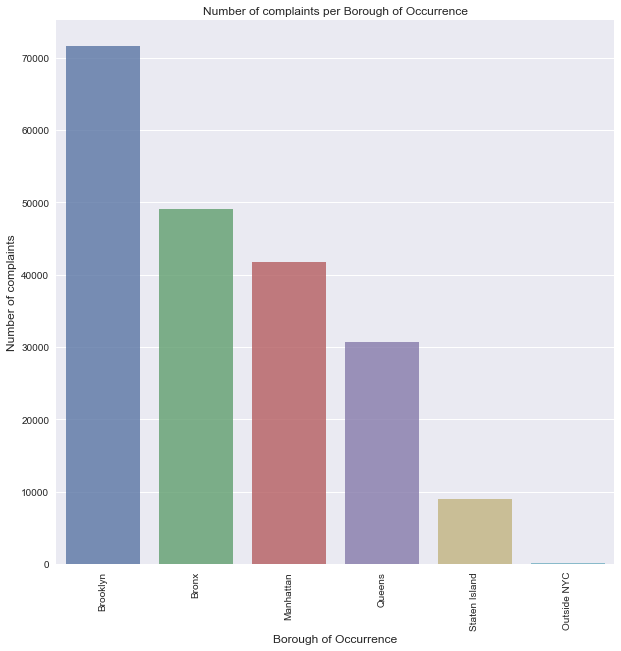

In [134]:
bar_chart(df, 'Borough of Occurrence')

Since the number of complains outside the NYC is statisticaly insignificant in compare to Complains from NYC, I ignore them in my future calculations!

In [135]:
df = df[df['Borough of Occurrence'] != 'Outside NYC']

Percentage of complaints per district is:

In [136]:
df['Borough of Occurrence'].value_counts()*100/len(df)

Brooklyn         35.397968
Bronx            24.298395
Manhattan        20.673046
Queens           15.150706
Staten Island     4.479885
Name: Borough of Occurrence, dtype: float64

35% of total complaints from 1999 to 2017 are from Brooklyn.

Lets have a closer look into the year 2016. According to Wikipedia the Population of 5 districts of New York in 2016 is as follow:

Brooklyn: 2,629,150

Bronx: 1,455,720

Manhattan: 1,643,734

Queens: 2,333,054

Staten Island: 476,015

Number of complaints per 100k residents in each district would be as follow:

In [137]:
df_2016 = df[df['Received Year'] == 2016]
df_2016['Borough of Occurrence'].value_counts()
population_2016 = pd.Series(data = [2629150,1455720,1643734,2333054,476015], index= ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island'])

(df_2016['Borough of Occurrence'].value_counts() * 10000 / population_2016).sort_values(ascending=False)

Bronx            18.286484
Manhattan        14.655656
Brooklyn         12.627655
Staten Island    10.671933
Queens            7.243724
dtype: float64

Each Complaint has a Received and Closed year:

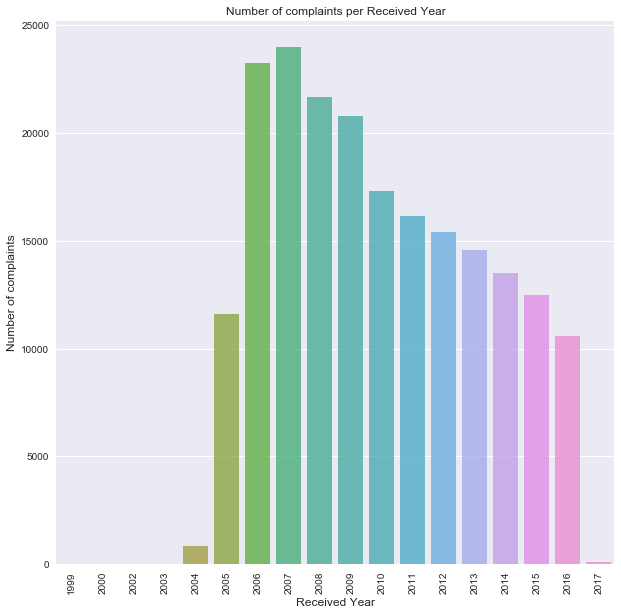

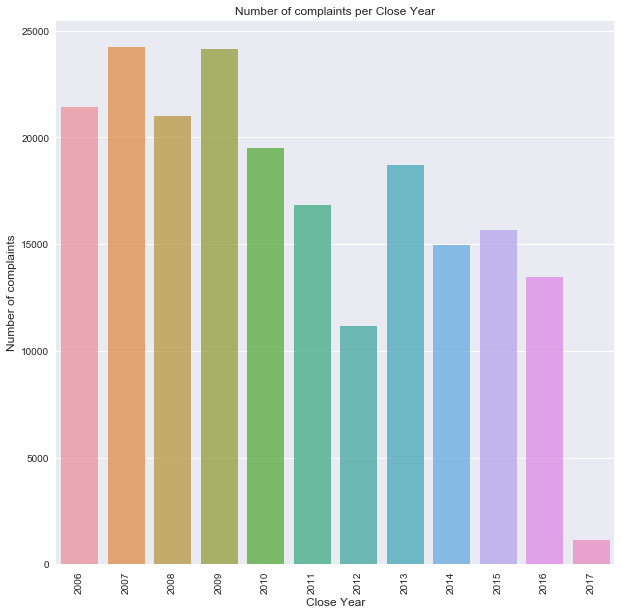

In [138]:
bar_chart(df, 'Received Year')
bar_chart(df, 'Close Year')

In [139]:
round((df['Close Year'] - df['Received Year']).mean(),2)

0.59

On average it takes 0.59 a year  for a complaint to be closed. Here we can see that the data for 2017 is not yet complete. It also seems that the complaints before 2006 has not been properly recorded. For example there is no record for complaints in 2001! As a result, for furthere analysis we will exclude the received data for these years: 1999-2005 and 2017. 

In [140]:
df = df[df['Received Year'] > 2005]
df = df[df['Received Year'] != 2017]

<a id="clean"></a>
# Analyzing Data

We know that complaints about "stop and frisk" have been declining. Here, I am going to use linear regression from the year complaints about stop and frisk peaked through 2016(inclusive) 
to predict how many "stop and frisk" incidents in 2018 will eventually lead to a 
complaint:

In [141]:
values = df.groupby('Received Year')['Complaint Contains Stop & Frisk Allegations'].sum()
print values

Received Year
2006    10694.0
2007    11387.0
2008     9363.0
2009     8791.0
2010     7107.0
2011     6433.0
2012     5990.0
2013     5331.0
2014     4448.0
2015     4219.0
2016     3609.0
Name: Complaint Contains Stop & Frisk Allegations, dtype: float64


In [145]:
X = np.array(values.index).reshape(-1,1)
y = np.array(values)
lm = LinearRegression()
lm.fit(X,y)
print lm.coef_
print lm.intercept_ 

print "\npredicted value for 2018 is:", round(lm.predict(2018), 0)


[-789.80909091]
1595339.9

predicted value for 2018 is: 1505.0


In [146]:
y_predicted = lm.predict(X)
print y_predicted

[ 10982.86363636  10193.05454545   9403.24545455   8613.43636364
   7823.62727273   7033.81818182   6244.00909091   5454.2          4664.39090909
   3874.58181818   3084.77272727]


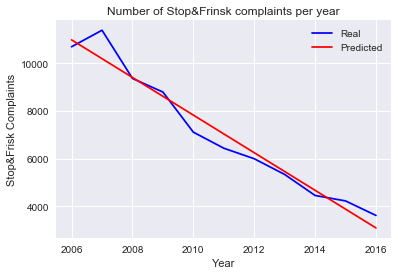

In [70]:
plt.plot(X, y, color = 'b', label = 'Real')
plt.plot(X, y_predicted, color ='r', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Stop&Frisk Complaints")
plt.title("Number of Stop&Frinsk complaints per year")
plt.legend()
plt.show()

Each row in the data set corresponds with a specific allegation. Therefore a particular complaint, designated by 'UniqueComplaintId', may have multiple allegations which is specified by 'Allegation FADO Type'. We want to see if the presence of a certain type of allegation indicative that a complaint will contain multiple allegations. In order to do this, I will create indicator variables for whether a complaint contains each type of allegation; then I perform a linear regression of the number of allegations per complaint against 
these indicator variables.  Then I calculate the maximum coefficient of the resulted multi-variable linear regression.

In [156]:
# building the 68467 * 4 size feature matrix X. 68467 is the number of unique complaints. 
# for each unique complaint number there is a list of size 4, in which each member corresponds 
# to a specific type of allegation

allegations_type_dict = dict()
for index, row in df.iterrows():
   allegations_type_dict[row['UniqueComplaintId']] = [0,0,0,0]

for index, row in df.iterrows():
    if row['Allegation FADO Type'] == 'Abuse of Authority':
        allegations_type_dict[row['UniqueComplaintId']][0] = 1
                        
    elif row['Allegation FADO Type'] == 'Force':
        allegations_type_dict[row['UniqueComplaintId']][1] = 1

    elif row['Allegation FADO Type'] == 'Discourtesy':
        allegations_type_dict[row['UniqueComplaintId']][2] = 1
                        
    elif row['Allegation FADO Type'] == 'Offensive Language':
        allegations_type_dict[row['UniqueComplaintId']][3] = 1

allegations_count_dict = defaultdict(int)

for index, row in df.iterrows():
    allegations_count_dict[row['UniqueComplaintId']] += 1
                          
allegations_type = []
allegations_count = []

for complain_id in allegations_type_dict:
    allegations_type.append(allegations_type_dict[complain_id])
    allegations_count.append(allegations_count_dict[complain_id])

X =  np.array(allegations_type)  
y =  np.array(allegations_count).reshape(-1,1)

lm = LinearRegression()
lm.fit(X,y)

print lm.coef_


[[ 2.533771    1.85852235  1.58769539  1.45113731]]


It seems that 'Abuse of Authority' more than any other type all of allegation indicates that a complaint will contain multiple allegations.

Here I calculate the chi-square test statistic for testing whether a complaint is more 
likely to receive a full investigation when it has video evidence.

In [149]:
X = np.array(df['Complaint Has Video Evidence']).reshape(-1,1)
y = np.array(df['Is Full Investigation']).reshape(-1,1)
print chi2(X, y)

(array([ 5055.07197369]), array([ 0.]))


The P-Value is < .00001. The result is significant at p < .01. In other word, a complaint almost always get full investigation when it has Video Evidence.  